# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [8]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [11]:
sinasc1 = sinasc_raw[['munResLat', 'munResLon', 'munResAlt']]
munResLat = sinasc1['munResLat']
faixa_munResLat = [-float('inf'), -10.5, float('inf')]
categorias = pd.cut(munResLat, faixa_munResLat)

sinasc1.groupby(categorias, observed=True).agg({
    'munResLon': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'munResAlt': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

munResLon                                           \
                        sum       mean       min       max    median   
munResLat                                                              
(-inf, -10.5] -804257.01023 -61.899254 -65.32395 -60.13858 -61.90944   
(-10.5, inf]  -891822.01897 -63.547244 -65.32915 -61.99959 -63.83145   

                                   munResAlt                                   \
                    std       var        sum        mean    min    max median   
munResLat                                                                       
(-inf, -10.5]  1.231482  1.516548  3310445.0  254.786808  133.0  595.0  191.0   
(-10.5, inf]   0.627696  0.394002  1530415.0  109.050520   85.0  192.0   87.0   

                                         
                      std           var  
munResLat                                
(-inf, -10.5]  139.771518  19536.077237  
(-10.5, inf]    30.071422    904.290400

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [13]:
sinasc2 = sinasc_raw[['munResArea', 'QTDGESTANT', 'QTDPARTNOR']]
munResArea = sinasc2['munResArea']
faixa_munResArea = [-float('inf'), 3000, float('inf')]


categorias = pd.cut(munResArea, faixa_munResArea)

sinasc2.groupby(categorias, observed=True).agg({
    'QTDGESTANT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDPARTNOR': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

QTDGESTANT                                                  \
                      sum      mean  min   max median       std       var   
munResArea                                                                  
(-inf, 3000.0]     5870.0  1.134300  0.0   9.0    1.0  1.208914  1.461473   
(3000.0, inf]     27046.0  1.310368  0.0  52.0    1.0  1.447429  2.095052   

               QTDPARTNOR                                                  
                      sum      mean  min   max median       std       var  
munResArea                                                                 
(-inf, 3000.0]     1912.0  0.371334  0.0  10.0    0.0  0.856441  0.733490  
(3000.0, inf]     12659.0  0.632982  0.0  41.0    0.0  1.278932  1.635668

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [15]:
sinasc_raw.dtypes.to_dict()

{'ORIGEM': dtype('int64'),
 'CODESTAB': dtype('float64'),
 'CODMUNNASC': dtype('int64'),
 'LOCNASC': dtype('int64'),
 'IDADEMAE': dtype('int64'),
 'ESTCIVMAE': dtype('float64'),
 'ESCMAE': dtype('O'),
 'CODOCUPMAE': dtype('float64'),
 'QTDFILVIVO': dtype('float64'),
 'QTDFILMORT': dtype('float64'),
 'CODMUNRES': dtype('int64'),
 'GESTACAO': dtype('O'),
 'GRAVIDEZ': dtype('O'),
 'PARTO': dtype('O'),
 'CONSULTAS': dtype('int64'),
 'DTNASC': dtype('O'),
 'HORANASC': dtype('float64'),
 'SEXO': dtype('O'),
 'APGAR1': dtype('float64'),
 'APGAR5': dtype('float64'),
 'RACACOR': dtype('O'),
 'PESO': dtype('int64'),
 'IDANOMAL': dtype('float64'),
 'DTCADASTRO': dtype('O'),
 'CODANOMAL': dtype('O'),
 'NUMEROLOTE': dtype('int64'),
 'VERSAOSIST': dtype('O'),
 'DTRECEBIM': dtype('O'),
 'DIFDATA': dtype('int64'),
 'DTRECORIGA': dtype('float64'),
 'NATURALMAE': dtype('float64'),
 'CODMUNNATU': dtype('float64'),
 'CODUFNATU': dtype('float64'),
 'ESCMAE2010': dtype('float64'),
 'SERIESCMAE': dtype('floa

In [16]:
sinasc3 = sinasc_raw[['munResAlt','TPAPRESENT','DTDECLARAC']]
munResAlt = sinasc3['munResAlt']
nome_faixas_munResAlt = ['Acima da média', 'Abaixo da média']

categorias = pd.cut(munResAlt, bins=2, labels=nome_faixas_munResAlt)
sinasc3.groupby(categorias, observed=True).agg({
    'TPAPRESENT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'DTDECLARAC': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

TPAPRESENT                                                 \
                       sum      mean  min  max median       std       var   
munResAlt                                                                   
Acima da média     26203.0  1.056402  1.0  9.0    1.0  0.452924  0.205140   
Abaixo da média     2230.0  1.138917  1.0  9.0    1.0  0.831242  0.690963   

                   DTDECLARAC                                       \
                          sum          mean        min         max   
munResAlt                                                            
Acima da média   3.941927e+11  1.575636e+07  1012019.0  31122019.0   
Abaixo da média  3.063839e+10  1.565580e+07  1012019.0  31122019.0   

                                                         
                     median           std           var  
munResAlt                                                
Acima da média   16022019.0  8.739201e+06  7.637364e+13  
Abaixo da média  15112019.0  8.816617e+06  7.773273e+13

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [18]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

<Axes: xlabel='MES'>

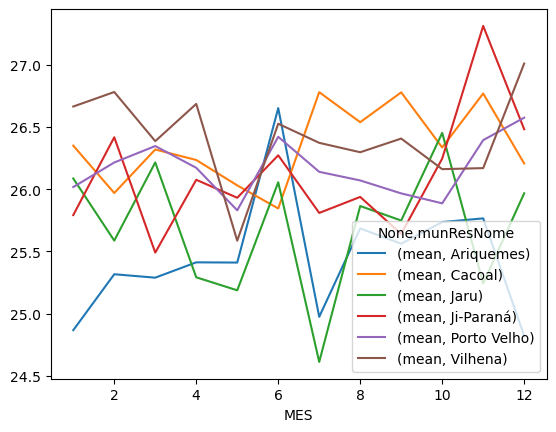

In [19]:
sinasc4 = sinasc_raw[['IDADEMAE', 'munResNome', 'DTNASC']]
sinasc4 = sinasc4.set_index('munResNome')
sinasc4.DTNASC = pd.to_datetime(sinasc4['DTNASC'])
sinasc4['MES'] = sinasc4.DTNASC.dt.month

agrupamento = sinasc4.groupby(['MES', imediatas], dropna=False).agg({
    'IDADEMAE': ['mean']
})

tabela_pivo = agrupamento.pivot_table(index='MES', columns='munResNome', values='IDADEMAE')
tabela_pivo.plot()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [22]:
idhRO = pd.read_csv('idh_municipios_rondonia.csv')
idhRO = idhRO.sort_values('Município')
idhRO = idhRO.set_index('Município')
idhRO = idhRO.drop(columns=['Posição'])

idhRO.head()

,IDH municipal,IDH renda,IDH longevidade,IDH educação
Município,,,,
Alta Floresta d'Oeste,0.641,0.657,0.763,0.526
Alto Alegre dos Parecis,0.592,0.603,0.777,0.443
Alto Paraíso,0.625,0.664,0.804,0.457
Alvorada d'Oeste,0.643,0.654,0.763,0.534
Ariquemes,0.702,0.716,0.806,0.600


In [23]:
media_sinasc = sinasc_raw.groupby('munResNome').agg({
    'IDADEMAE':[('IDADEMAE-M','mean')],
    'PESO':[('PESO-M','mean')]
})

media_sinasc.head()

,IDADEMAE,PESO
,IDADEMAE-M,PESO-M
munResNome,,
Alta Floresta D'Oeste,25.991826,3240.841962
Alto Alegre dos Parecis,24.844156,3261.383117
Alto Paraíso,24.960177,3217.969027
Alvorada D'Oeste,25.770732,3225.712195
Ariquemes,25.607866,3251.362637


In [24]:
gmedia_sinsc = media_sinasc.groupby(imediatas).mean()
gmedia_sinsc

,IDADEMAE,PESO
,IDADEMAE-M,PESO-M
munResNome,,
Ariquemes,25.411294,3233.950281
Cacoal,26.431961,3204.407682
Jaru,25.499523,3233.140693
Ji-Paraná,25.908482,3227.848621
Porto Velho,25.681766,3277.981436
Vilhena,26.062806,3274.152770


In [25]:
gmedia_idh = idhRO.groupby(imediatas).mean()

In [26]:
gmedia_idh

,IDH municipal,IDH renda,IDH longevidade,IDH educação
Município,,,,
Ariquemes,0.630500,0.663250,0.787250,0.481500
Cacoal,0.656444,0.657444,0.798444,0.540333
Jaru,0.614500,0.640500,0.775000,0.469000
Ji-Paraná,0.636250,0.653583,0.784250,0.503750
Porto Velho,0.648600,0.666200,0.796200,0.516200
Vilhena,0.669714,0.671286,0.798286,0.562286


In [27]:
df = pd.concat([gmedia_idh, gmedia_sinsc], axis=1, join='inner')
df.columns = ['IDH municipal', 'IDH renda', 'IDH longevidade', 'IDH educação', 'IDADEMAE-M', 'PESO-M']

df

,IDH municipal,IDH renda,IDH longevidade,IDH educação,IDADEMAE-M,PESO-M
Ariquemes,0.630500,0.663250,0.787250,0.481500,25.411294,3233.950281
Cacoal,0.656444,0.657444,0.798444,0.540333,26.431961,3204.407682
Jaru,0.614500,0.640500,0.775000,0.469000,25.499523,3233.140693
Ji-Paraná,0.636250,0.653583,0.784250,0.503750,25.908482,3227.848621
Porto Velho,0.648600,0.666200,0.796200,0.516200,25.681766,3277.981436
Vilhena,0.669714,0.671286,0.798286,0.562286,26.062806,3274.152770


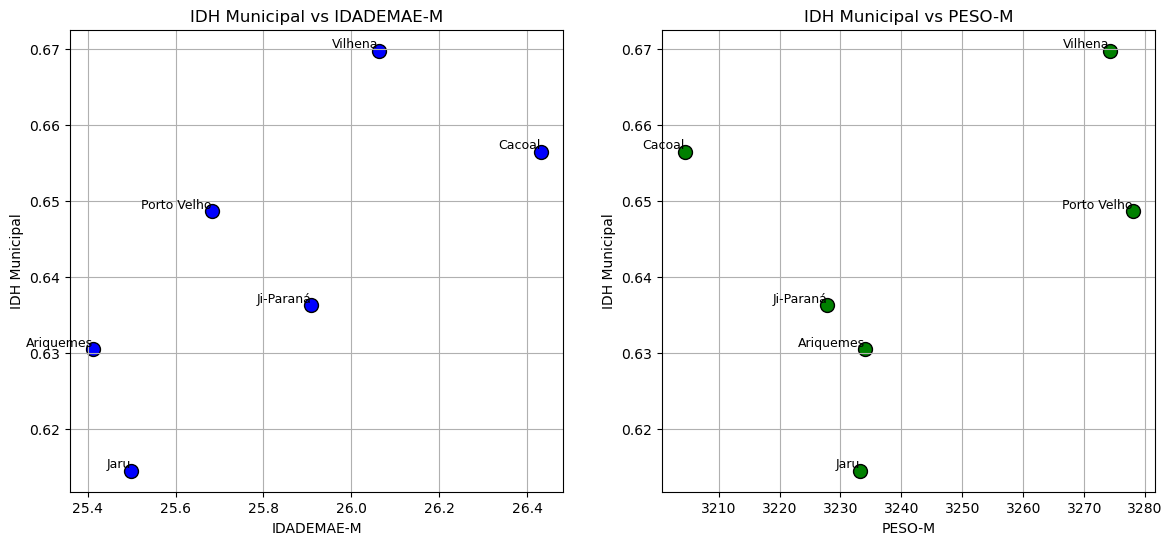

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(df['IDADEMAE-M'].iloc[:], df['IDH municipal'], color='blue', s=100, edgecolor='black')
for i in range(len(df)):
    axs[0].text(df['IDADEMAE-M'].iloc[i], df['IDH municipal'].iloc[i], df.index[i], fontsize=9, ha='right', va='bottom')
    
axs[0].set_title('IDH Municipal vs IDADEMAE-M', fontsize=12)
axs[0].set_xlabel('IDADEMAE-M', fontsize=10)
axs[0].set_ylabel('IDH Municipal', fontsize=10)
axs[0].grid(True)

axs[1].scatter(df['PESO-M'].iloc[:], df['IDH municipal'], color='green', s=100, edgecolor='black')
for i in range(len(df)):
    axs[1].text(df['PESO-M'].iloc[i], df['IDH municipal'].iloc[i], df.index[i], fontsize=9, ha='right', va='bottom')

axs[1].set_title('IDH Municipal vs PESO-M', fontsize=12)
axs[1].set_xlabel('PESO-M', fontsize=10)
axs[1].set_ylabel('IDH Municipal', fontsize=10)
axs[1].grid(True)


- Podemos ver nos dois gráficos, as regiões de RO e a influéncia do IDH das mesmas, no peso do bebê e na idade das mães.
- Cidades com IDH maior é resultado da espera maior das mulheres, antes de serem mães.
  - Hipótes: Mulherem esperem mais tempo em seus estudos e trabalho antes de serem mães.
- Cidades com IDH maior, implica em crianças mais pesadas.
  - Hipótese: Maior fartura alimentar, implicando na gestação. 
  

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [31]:
ifdm = pd.read_csv('IFDM_2013.csv')
ifdm = ifdm.set_index('Município')
ifdm = ifdm.drop(columns=['Posição'])
ifdm.head()

,IFDM (2013)
Município,
Ariquemes,0.7746
Vilhena,0.7465
Pimenta Bueno,0.7383
Porto Velho,0.7257
Ji-Paraná,0.7117


In [32]:
gifdm = ifdm.groupby(imediatas).mean()
gifdm

,IFDM (2013)
Município,
Ariquemes,0.599643
Cacoal,0.612844
Jaru,0.553175
Ji-Paraná,0.611608
Porto Velho,0.599680
Vilhena,0.642686


In [33]:
df = pd.concat([gifdm, gmedia_sinsc], axis=1, join='inner')
df.columns = ['IFDM-M', 'IDADEMAE-M', 'PESO-M']
df

,IFDM-M,IDADEMAE-M,PESO-M
Ariquemes,0.599643,25.411294,3233.950281
Cacoal,0.612844,26.431961,3204.407682
Jaru,0.553175,25.499523,3233.140693
Ji-Paraná,0.611608,25.908482,3227.848621
Porto Velho,0.599680,25.681766,3277.981436
Vilhena,0.642686,26.062806,3274.152770


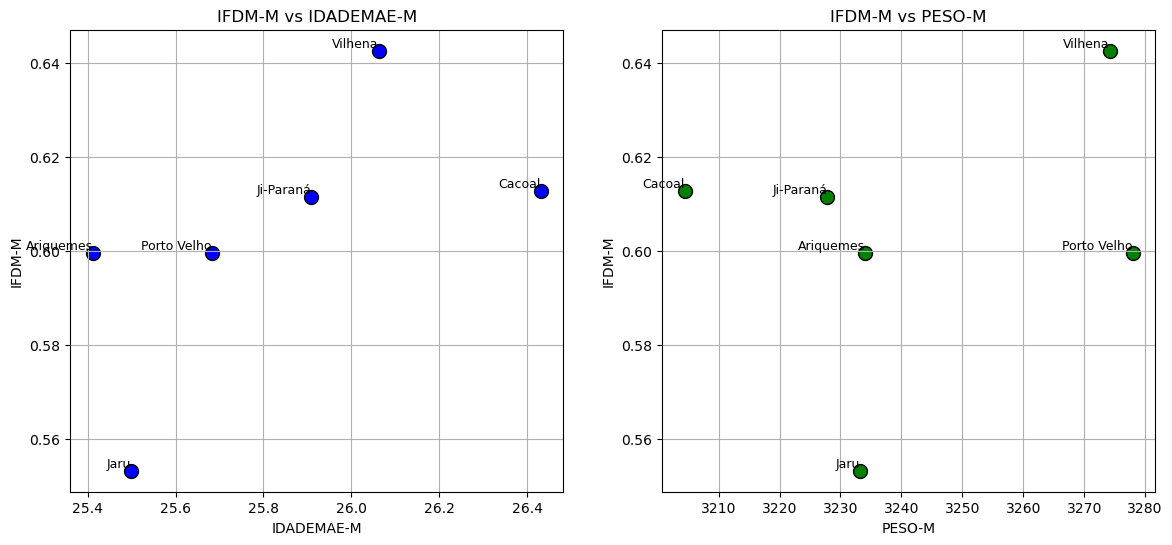

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(df['IDADEMAE-M'].iloc[:], df['IFDM-M'], color='blue', s=100, edgecolor='black')
for i in range(len(df)):
    axs[0].text(df['IDADEMAE-M'].iloc[i], df['IFDM-M'].iloc[i], df.index[i], fontsize=9, ha='right', va='bottom')
    
axs[0].set_title('IFDM-M vs IDADEMAE-M', fontsize=12)
axs[0].set_xlabel('IDADEMAE-M', fontsize=10)
axs[0].set_ylabel('IFDM-M', fontsize=10)
axs[0].grid(True)

axs[1].scatter(df['PESO-M'].iloc[:], df['IFDM-M'], color='green', s=100, edgecolor='black')
for i in range(len(df)):
    axs[1].text(df['PESO-M'].iloc[i], df['IFDM-M'].iloc[i], df.index[i], fontsize=9, ha='right', va='bottom')

axs[1].set_title('IFDM-M vs PESO-M', fontsize=12)
axs[1].set_xlabel('PESO-M', fontsize=10)
axs[1].set_ylabel('IFDM-M', fontsize=10)
axs[1].grid(True)

- o IFDM tem relação parecida com o IDH
  

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [39]:
pib = pd.read_csv('PIB_RO_2019.csv')
pib = pib.drop(columns=['Posição'])
pib = pib.set_index('Município')
pib.head()

,PIB 2019,Alteração
Município,,
Porto Velho,17912070,Aumento
Ji-Paraná,3783972,Aumento
Vilhena,2831175,Aumento
Ariquemes,2579830,Aumento
Cacoal,2261644,Aumento


In [73]:
df = pd.concat([pib, gmedia_sinsc], axis=1, join='inner')
df.columns = ['PIB-M', 'Alteração', 'IDADEMAE-M', 'PESO-M']
df

,PIB-M,Alteração,IDADEMAE-M,PESO-M
Porto Velho,17912070,Aumento,25.681766,3277.981436
Ji-Paraná,3783972,Aumento,25.908482,3227.848621
Vilhena,2831175,Aumento,26.062806,3274.152770
Ariquemes,2579830,Aumento,25.411294,3233.950281
Cacoal,2261644,Aumento,26.431961,3204.407682
Jaru,1500890,Aumento,25.499523,3233.140693


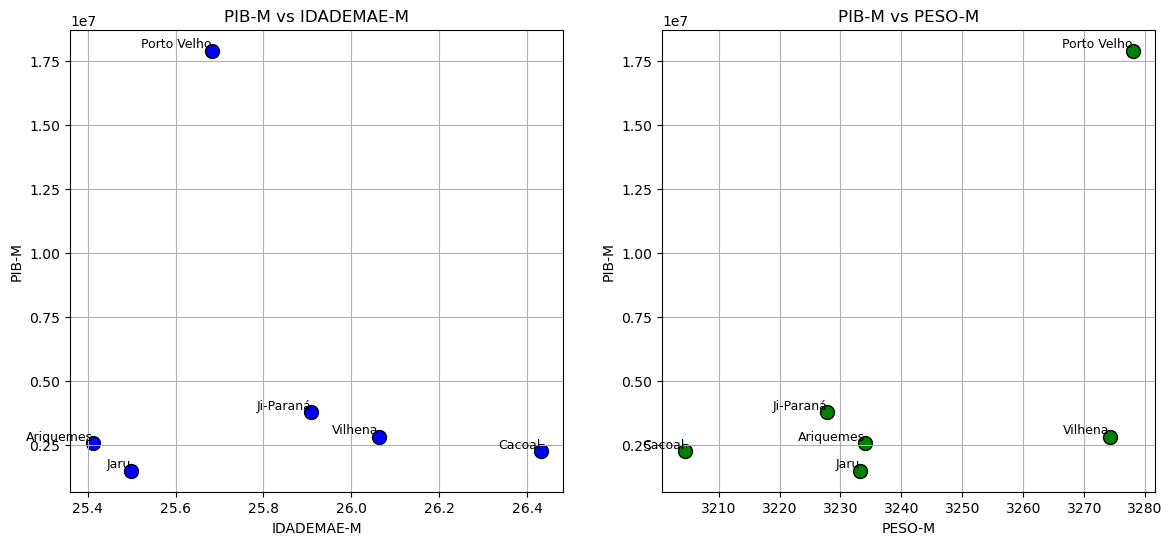

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(df['IDADEMAE-M'].iloc[:], df['PIB-M'], color='blue', s=100, edgecolor='black')
for i in range(len(df)):
    axs[0].text(df['IDADEMAE-M'].iloc[i], df['PIB-M'].iloc[i], df.index[i], fontsize=9, ha='right', va='bottom')
    
axs[0].set_title('PIB-M vs IDADEMAE-M', fontsize=12)
axs[0].set_xlabel('IDADEMAE-M', fontsize=10)
axs[0].set_ylabel('PIB-M', fontsize=10)
axs[0].grid(True)

axs[1].scatter(df['PESO-M'].iloc[:], df['PIB-M'], color='green', s=100, edgecolor='black')
for i in range(len(df)):
    axs[1].text(df['PESO-M'].iloc[i], df['PIB-M'].iloc[i], df.index[i], fontsize=9, ha='right', va='bottom')

axs[1].set_title('PIB-M vs PESO-M', fontsize=12)
axs[1].set_xlabel('PESO-M', fontsize=10)
axs[1].set_ylabel('PIB-M', fontsize=10)
axs[1].grid(True)


- É possível ver com clareza que o aut